<h1 style="color:green">Credit Defaulter Prediction</h1>

## Wrangling raw Data

In [1]:
import pandas as pd
path = "P://scanning folder//default of credit card clients (1).xls"

In [2]:
df = pd.read_excel(path , header = 1)

In [3]:
df.shape

(30000, 25)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [7]:
df = df[df['EDUCATION'] >0]

In [8]:
df = df[df['EDUCATION'] < 5]

In [9]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
df['default payment next month'].value_counts()

0    23045
1     6610
Name: default payment next month, dtype: int64

In [12]:
cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [13]:
final = pd.get_dummies(df , columns = cols , drop_first = True)

In [14]:
final.head(5)

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


In [15]:
final.shape

(29655, 81)

In [16]:
list(final.columns)

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'SEX_2',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3',
 'PAY_0_-1',
 'PAY_0_0',
 'PAY_0_1',
 'PAY_0_2',
 'PAY_0_3',
 'PAY_0_4',
 'PAY_0_5',
 'PAY_0_6',
 'PAY_0_7',
 'PAY_0_8',
 'PAY_2_-1',
 'PAY_2_0',
 'PAY_2_1',
 'PAY_2_2',
 'PAY_2_3',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_-1',
 'PAY_3_0',
 'PAY_3_1',
 'PAY_3_2',
 'PAY_3_3',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_-1',
 'PAY_4_0',
 'PAY_4_1',
 'PAY_4_2',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_-1',
 'PAY_5_0',
 'PAY_5_2',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_-1',
 'PAY_6_0',
 'PAY_6_2',
 'PAY_6_3',
 'PAY_6_4',
 'PAY_6_5',
 'PAY_6_6

In [17]:
final.drop('ID' , axis = 1 , inplace = True)

In [18]:
final

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,1,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,1,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,1,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,1,0,0,0,0,0,0,0,0


In [19]:
final_default = final[final['default payment next month'] == 1]
final_not_default = final[final['default payment next month'] == 0]

In [20]:
final_default

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
13,70000,30,65802,67369,65701,66782,36137,36894,3200,0,...,0,0,0,1,0,0,0,0,0,0
16,20000,24,15376,18010,17428,18338,17905,19104,3200,0,...,0,0,0,1,0,0,0,0,0,0
21,120000,39,316,316,316,0,632,316,316,316,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000,34,2500,2500,2500,2500,2500,2500,0,0,...,0,0,0,1,0,0,0,0,0,0
29994,80000,34,72557,77708,79384,77519,82607,81158,7000,3500,...,0,0,0,1,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,1,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,1,0,0,0,0,0,0,0,0


In [21]:
final_default.shape

(6610, 80)

In [22]:
final_default = final_default.head(1000)
final_not_default = final_not_default.head(1000)

In [23]:
final_df = pd.concat([final_default , final_not_default])
final_df.shape

(2000, 80)

## final desired Dataframe to work upon

In [24]:
final_df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
13,70000,30,65802,67369,65701,66782,36137,36894,3200,0,...,0,0,0,1,0,0,0,0,0,0
16,20000,24,15376,18010,17428,18338,17905,19104,3200,0,...,0,0,0,1,0,0,0,0,0,0
21,120000,39,316,316,316,0,632,316,316,316,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,50000,26,25060,26649,28202,30727,30098,32580,2000,2000,...,0,0,1,0,0,0,0,0,0,0
1278,170000,31,24581,25611,26631,27383,27801,31337,1728,1748,...,0,0,1,0,0,0,0,0,0,0
1279,400000,30,-200,-200,-200,746,3956,2500,0,0,...,0,0,0,0,0,0,0,0,0,0
1280,200000,31,38635,41031,45929,48661,49723,50896,3031,5929,...,0,0,1,0,0,0,0,0,0,0


In [25]:
final_df['default payment next month'].value_counts()

1    1000
0    1000
Name: default payment next month, dtype: int64

# start of Support Vector Machine(SVM) algorithm

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [27]:
X = final_df.drop('default payment next month',axis = 1)
y = final_df['default payment next month']

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42)

In [29]:
y_train.value_counts()

0    757
1    743
Name: default payment next month, dtype: int64

In [30]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_train_scaled

array([[ 0.32458695, -0.34952643, -0.60537663, ..., -0.05783149,
        -0.05170877,  0.        ],
       [ 0.32458695, -0.13327993, -0.67367863, ..., -0.05783149,
        -0.05170877,  0.        ],
       [ 1.1830073 ,  0.83982934,  2.86249476, ..., -0.05783149,
        -0.05170877,  0.        ],
       ...,
       [-0.84598627, -1.1063892 , -0.02534016, ..., -0.05783149,
        -0.05170877,  0.        ],
       [ 0.40262516, -0.45764969, -0.67367863, ..., -0.05783149,
        -0.05170877,  0.        ],
       [-0.37775698, -0.8901427 ,  0.67432426, ..., -0.05783149,
        -0.05170877,  0.        ]])

In [31]:
from sklearn.svm import SVC

## training model with X_train_scaled dataset

In [32]:
cl_svm = SVC(random_state = 42)
cl_svm.fit(X_train_scaled , y_train)

SVC(random_state=42)

In [33]:
from sklearn.metrics import plot_confusion_matrix

<h2 style="color:red">Confusion matrix</h2>

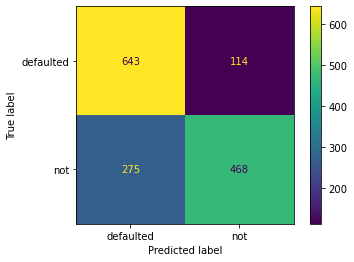

In [34]:
plot_confusion_matrix(cl_svm , X_train_scaled , y_train , values_format = 'd' , display_labels = ['defaulted' , 'not'])

## testing model on X_test dataset

In [35]:
predict = cl_svm.predict(X_test_scaled)
predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [36]:
import numpy as np
accurate = np.array(y_test)
accurate

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [37]:
res = predict+accurate

In [38]:
res

array([1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2,
       0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0,
       2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1,
       0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1,

In [39]:
total = len(res)

In [40]:
des = list(filter(lambda x:x != 1 , res))

In [41]:
desired = len(des)

In [42]:
accuracy = (desired / total) * 100

<h3 style="color:blue ; font-family:lucida handwriting">Result</h3>

In [43]:
print(f'Accuracy of model is {accuracy} %')

Accuracy of model is 65.0 %
